In [4]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [7]:
from sklearn.preprocessing import LabelEncoder

# Load your dataset (adjust the path accordingly)
# df = pd.read_csv('your_dataset.csv')

# List of categorical columns to encode
categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows to verify the mapping
print(df.head())


   id  Brand  Material  Size  Compartments  Laptop Compartment  Waterproof  \
0   0      1         1     1           7.0                   1           0   
1   1      1         0     2          10.0                   1           1   
2   2      4         1     2           2.0                   1           0   
3   3      2         2     2           8.0                   1           0   
4   4      0         0     1           1.0                   1           1   

   Style  Color  Weight Capacity (kg)      Price  
0      2      0             11.611723  112.15875  
1      1      3             27.078537   68.88056  
2      1      5             16.643760   39.17320  
3      1      3             12.937220   80.60793  
4      1      3             17.749338   86.02312  


In [8]:
df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,0,1,2,9.0,0,0,2,1,12.730812,129.99749
299996,299996,1,1,0,6.0,0,1,2,1,26.633182,19.85819
299997,299997,3,0,0,9.0,1,1,0,4,11.898250,111.41364
299998,299998,0,2,2,1.0,0,1,2,4,6.175738,115.89080


id                        0
Brand                     0
Material                  0
Size                      0
Compartments              0
Laptop Compartment        0
Waterproof                0
Style                     0
Color                     0
Weight Capacity (kg)    138
Price                     0
dtype: int64


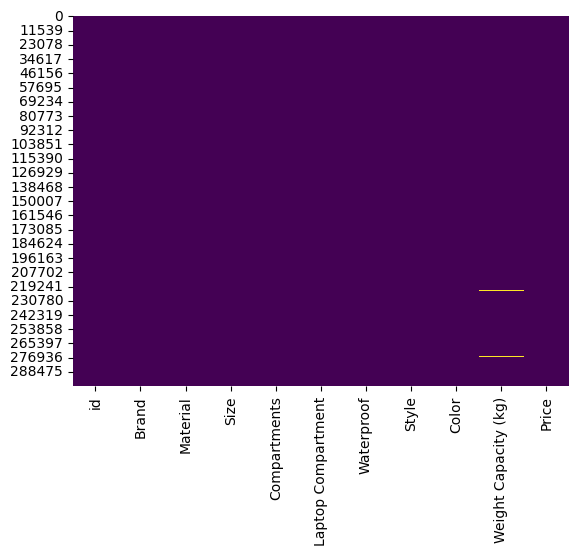

In [12]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

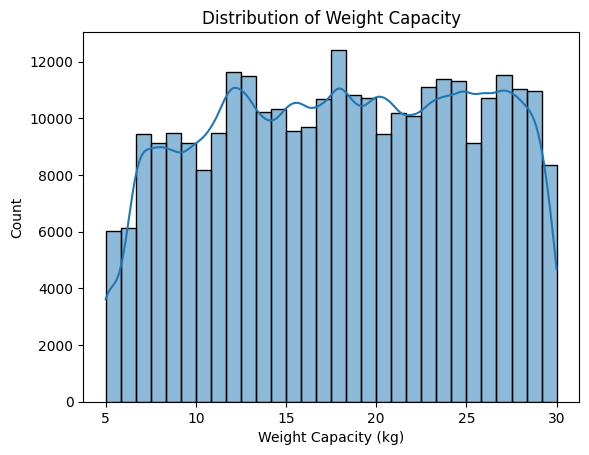

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution
sns.histplot(df['Weight Capacity (kg)'], bins=30, kde=True)
plt.title('Distribution of Weight Capacity')
plt.show()


In [16]:
# (bell-shaped), use mean:
# Instead of using inplace=True, assign the result back to the original DataFrame
df['Weight Capacity (kg)'] = df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].mean())


In [17]:
# Verify if missing values are handled
print(df['Weight Capacity (kg)'].isnull().sum())

0


In [21]:
# Separate features and target variable from train set
X_train = df.drop(['Price', 'id'], axis=1)
y_train = df['Price']

# Load your test dataset (adjust the path accordingly)
test = pd.read_csv('test.csv')

# Use the same feature columns for the test set
X_test = test.drop(['id'], axis=1)

# Print the shapes of the datasets to verify
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (300000, 9)
y_train shape: (300000,)
X_test shape: (200000, 9)


In [22]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# Load your datasets (adjust the paths accordingly)
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Separate features and target variable from train set
X_train = df.drop(['Price', 'id'], axis=1)
y_train = df['Price']

# Use the same feature columns for the test set
X_test = test.drop(['id'], axis=1)

# Encode categorical variables
le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

# Train your model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Print predictions
print(y_pred)


[108.25044  37.97441  59.68969 ...  55.94665  64.34705 114.49041]


In [26]:
# Load the sample_submission dataset (adjust the path accordingly)
sample_submission = pd.read_csv('sample_submission.csv')

# Prepare the submission DataFrame
submission = sample_submission.copy()
submission['Price'] = y_pred

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split the training data for validation
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model on the training part
dt_model.fit(X_train_part, y_train_part)

# Predict on the validation set
y_valid_pred = dt_model.predict(X_valid)

# Evaluate the model
mae = mean_absolute_error(y_valid, y_valid_pred)
mse = mean_squared_error(y_valid, y_valid_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_valid_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 45.46499614941666
Mean Squared Error (MSE): 3113.0212561490443
Root Mean Squared Error (RMSE): 55.79445542479149
R-squared (R2): -1.052610125859566


In [29]:
def predict_test_prices(model, test_df):

    X_test = pd.get_dummies(test_df, drop_first=True)

    X_train_columns = model.feature_names_in_  
    X_test = X_test.reindex(columns=X_train_columns, fill_value=0)

    predicted_prices = model.predict(X_test)

    test_df["Predicted Price"] = predicted_prices

    result_df = test_df.copy()
    result_df["Price"] = predicted_prices

    result_df = result_df[["id","Price"]]

    return result_df

In [31]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)


In [32]:
# Copy the sample submission
submission = sample_submission.copy()

# Assign the predicted prices
submission['Price'] = y_pred

# Round the prices to three decimal places as per Kaggle's format
submission['Price'] = submission['Price'].round(3)


In [33]:
# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'


In [34]:
# Check the first few rows of the submission file
print(submission.head())

       id    Price
0  300000   50.797
1  300001   30.632
2  300002   49.528
3  300003  141.426
4  300004   88.463
